EE399 HW1

Shaunak Bhide

GITHUB: https://github.com/gitbheeds


In [2]:
#import begin
import numpy as np
import scipy.optimize as opt
import matplotlib.pyplot as plt
#import end

[ 2.17172919 -0.90932558  0.73248889 31.45278064]


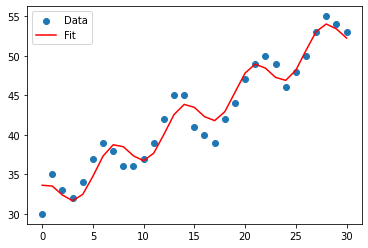

In [10]:
#Consider the following data from the class
X=np.arange(0,31)
Y=np.array([30, 35, 33, 32, 34, 37, 39, 38, 36, 36, 37, 39, 42, 45, 45, 41, 40, 39, 42, 44, 47, 49, 50, 49, 46, 48, 50, 53, 55, 54, 53])

#Fit the data to the following model with least squared error
#model of form f(x) = Acos(Bx)+Cx+D
def model (C, x) :
    
    #model 
    f_x =  C[0] * np.cos(C[1]*x) + C[2]*x + C[3]

    return f_x

def loss_func(C, x, y):
    return np.sum((y - model(C, x))**2)

#initial parameter guesses
c0 = np.array([1, np.pi/36, 1, 1])

result = opt.minimize(loss_func, c0, args=(X, Y), method = 'Nelder-Mead')

c_opt = result.x


# Print the optimal parameters
print(c_opt)

# Plot the results
plt.scatter(X, Y, label='Data')
plt.plot(X, model(c_opt, X), 'r-', label='Fit')
plt.legend()
plt.show()

In [24]:
#parameters to sweep through
Aval = np.linspace(0, 3, 3000)
Bval = np.linspace(-2, 2, 3000)
Cval = np.linspace(-0.5, 2, 3000)
Dval = np.linspace(0, 30, 3000)


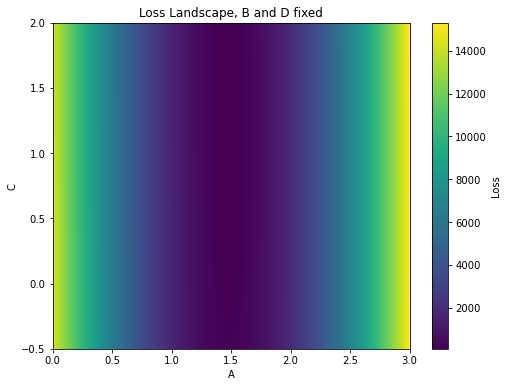

In [25]:

#fix B and D, sweep through A and C
loss_grid = np.zeros((len(Aval), len(Cval)))

#sweep A and C
for i, A in enumerate(Aval):
    for j, C in enumerate(Cval):
        loss = loss_func([A, c_opt[1], C, c_opt[3]], X, Y)
#store the loss value for the given combination of A and C sweeps
        loss_grid[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Aval, Cval, loss_grid, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('C')
plt.title('Loss Landscape, B and D fixed')
plt.show()

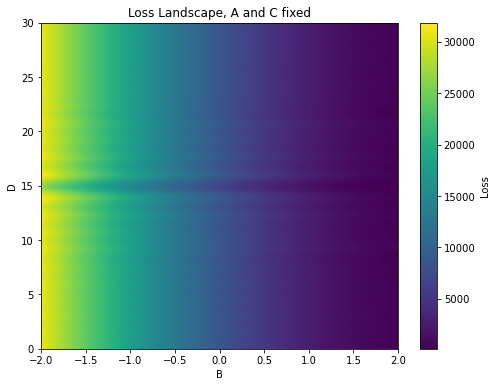

In [26]:
#fix A and C, sweep through B and D
loss_grid1 = np.zeros((len(Bval), len(Dval)))

#sweep A and C
for i, B in enumerate(Bval):
    for j, D in enumerate(Dval):
        loss = loss_func([c_opt[0], B, c_opt[2], D], X, Y)
#store the loss value for the given combination of B and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Bval, Dval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('B')
plt.ylabel('D')
plt.title('Loss Landscape, A and C fixed')
plt.show()

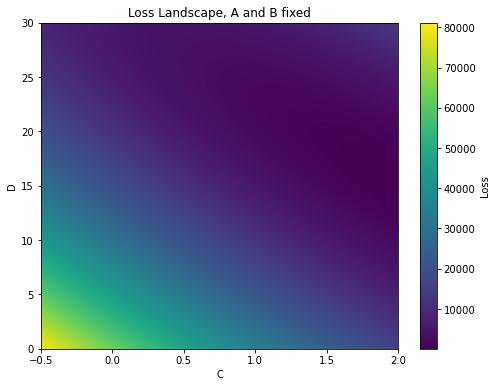

In [27]:
#fix A and B, sweep through C and D
loss_grid1 = np.zeros((len(Cval), len(Dval)))

#sweep C and D
for i, C in enumerate(Cval):
    for j, D in enumerate(Dval):
        loss = loss_func([c_opt[0], c_opt[1], C, D], X, Y)
#store the loss value for the given combination of C and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Cval, Dval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('C')
plt.ylabel('D')
plt.title('Loss Landscape, A and B fixed')
plt.show()

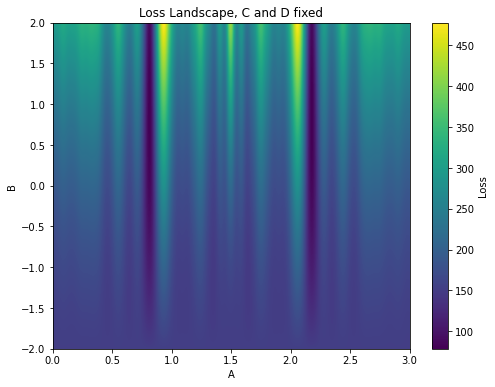

In [28]:
#fix C and D, sweep through A and B
loss_grid1 = np.zeros((len(Aval), len(Bval)))

#sweep A and B
for i, A in enumerate(Aval):
    for j, B in enumerate(Bval):
        loss = loss_func([A, B, c_opt[2], c_opt[3]], X, Y)
#store the loss value for the given combination of C and D sweeps
        loss_grid1[i,j] = loss
plt.figure(figsize=(8,6))
plt.pcolor(Aval, Bval, loss_grid1, cmap='viridis')
plt.colorbar(label='Loss')
plt.xlabel('A')
plt.ylabel('B')
plt.title('Loss Landscape, C and D fixed')
plt.show()